In [2]:
import sys
sys.path.append("./packages")
sys.path.append("./packages/neurolytics")
sys.path.append("./packages/blip_analysis")
sys.path.append("/camp/home/tootoos/working/tootoos/git/label_axes")
import matplotlib.pyplot as plt
import numpy as np
import blip_analysis as ba
from matplotlib.gridspec import GridSpec
import pickle
from sklearn.metrics import confusion_matrix
from label_axes import label_axes
import exp_blip_models as em
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
unit_usrt1, unit_usrt2, unit_usrt3= ba.load_usrts(filepath='./packages/blip_analysis/unit_usrts')
### Load in the data
good_indexes = ba.get_stable_resp_indexes()
unit_usrt1 = unit_usrt1[good_indexes]
unit_usrt2 = unit_usrt2[good_indexes]
unit_usrt3 = unit_usrt3[good_indexes]
glyphs = np.array(ba.get_glyphs())

units_usrt_long1 =np.load('Data/230704_Fig1_long_usrt1.npy', allow_pickle=True)
mean_usrt1 = np.array([[np.mean(i, axis=0) for i in j] for j in unit_usrt1])
mean_usrt2 = np.array([[np.mean(i, axis=0) for i in j] for j in unit_usrt2])
mean_usrt3 = np.array([[np.mean(i, axis=0) for i in j] for j in unit_usrt3])
mean_usrt_long1 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt_long1])

sum_usrt1 = mean_usrt1.sum(axis=-1)
sum_usrt2 = mean_usrt2.sum(axis=-1)
sum_usrt3 = mean_usrt3.sum(axis=-1)

res = pickle.Unpickler(open('Data/220313_classifier_score_and_preds.pkl', 'rb')).load()
res_shuf = pickle.Unpickler(open('Data/220313_classifier_score_and_preds_shuf.pkl', 'rb')).load()
res_rf = pickle.Unpickler(open('Data/220315_classifier_score_and_preds_RF.pkl', 'rb')).load()
res_joined_rf = pickle.Unpickler(open('Data/220315_classifier_score_and_preds_joined_RF.pkl', 'rb')).load()


Found odour 1
Found odour 3


Found odour 5


In [4]:
### Reshape the data for plotting
scores = res[:, :, :, :, 0].astype(float)
preds = np.array(list(res[:, :, :, :, 1]))
scores_shuf = res_shuf[:, :, :, 0].astype(float)
preds_shuf = res_shuf[:, :, :, 1]
scores_rf = res_rf[:, :, :, :, 0].astype(float)
preds_rf = res_rf[:, :, :, :, 1]
scores_joined_rf = res_joined_rf[:, :, :, :, 0].astype(float)
preds_joined_rf = res_joined_rf[:, :, :, :, 1]

In [5]:
### Label all trials by either their onset or concentration

labs_onset = np.where(em.trial_arrays['cao_array'][:, :5] == 1)[1]
labs_conc = np.where(em.trial_arrays['cao_array'][:, 5:] == 1)[1]
labs_conc = np.append([-1], labs_conc)
labs_onset = np.append([5], labs_onset)



In [6]:
### Generate extended labels for confusion matrices

conc_trials = [0, 16, 24, 28, 30, 31]
onset_trials = [16, 8, 4, 2, 1, 0]
iti_trials = [24, 20, 18, 17]
c_joined_true = [i for j in range(100) for i in labs_conc]
o_joined_true = [i for j in range(100) for i in labs_onset]
c_trues = [i for j in range(100) for i in conc_trials]
o_trues = [i for j in range(100) for i in onset_trials]
i_trues = [i for j in range(100) for i in iti_trials]

In [7]:
def plot_heatmap(ax, trues, preds, labels, set_glyphs=True):
    '''
    Plot confusion matrix heatmaps for part B
    '''
    cm = confusion_matrix(trues, preds, normalize='true', labels=labels)
    im = ax.imshow(cm, cmap='plasma')
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_ylim(len(labels)-0.5, -0.5)
    if set_glyphs:
        ax.set_xticklabels(glyphs[labels], rotation=90)
        ax.set_yticklabels(glyphs[labels])
    else:
        ax.set_xticklabels(labels, rotation=90)
        ax.set_yticklabels(labels)
    return im, np.max(cm), cm

def set_global_ylim(axs):
    '''
    A utility function which sets all axs to have the same y lims
    '''
    ylims = np.array([i.get_ylim() for i in axs])
    ymax = np.max(ylims[:, 1])
    ymin = np.min(ylims[:, 0])
    [i.set_ylim(ymin, ymax) for i in axs]

def forceAspect(ax,aspect=1):
    '''
    A utility function which forces the aspect ratio of a plot to be 1
    '''
    extent = ax.get_xlim() + ax.get_ylim()
    print(extent)
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

def plot_mean_and_std(ax, data, axis=0, xs = None, sem=False, color=None, label=None):
    '''
    Plot the mean and standard deviation of a dataset
    '''
    mean_data = np.mean(data, axis=axis)
    if xs is None:
        xs = np.arange(len(mean_data))
    std_data = np.std(data, axis=axis)
    if sem:
        std_data = std_data / np.sqrt(data.shape[axis])
    mins = mean_data - std_data
    maxs = mean_data + std_data
    ax.plot(xs, mean_data, color=color, label=label)
    ax.fill_between(xs, mins, maxs, alpha=0.5, color=color)

(-6.45, 135.45, 0.0, 0.9319821014447636)
(-6.45, 135.45, 0.0, 0.9319821014447636)
(-6.45, 135.45, 0.0, 0.9319821014447636)
(-6.45, 135.45, 0.0, 0.9319821014447636)
(-6.45, 135.45, 0.0, 0.9319821014447636)


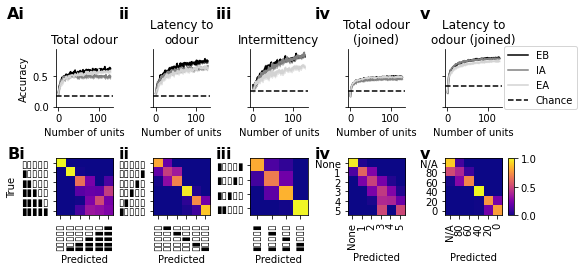

In [9]:
### Plotting

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 5, wspace=0.7, hspace=0)
odour_grays = ['k', 'gray', 'lightgray']
labels=['EB', 'IA', 'EA']

### Make the axes for all parts of A
acc_ax1 = fig.add_subplot(gs[0, 0])
acc_ax2 = fig.add_subplot(gs[0, 1])
acc_ax3 = fig.add_subplot(gs[0, 2])
acc_ax4 = fig.add_subplot(gs[0, 3])
acc_ax5 = fig.add_subplot(gs[0, 4])

# Plot the mean and std (in this case its been changed to the SEM) 
for i in range(3):
    plot_mean_and_std(acc_ax1, scores_rf[i, 0], axis=-1, sem=True, color=odour_grays[i])
    plot_mean_and_std(acc_ax2, scores_rf[i, 1], axis=-1, sem=True, color=odour_grays[i])
    plot_mean_and_std(acc_ax3, scores_rf[i, 2], axis=-1, sem=True, color=odour_grays[i])
    plot_mean_and_std(acc_ax4, scores_joined_rf[i, 0], axis=-1, sem=True, color=odour_grays[i])
    plot_mean_and_std(acc_ax5, scores_joined_rf[i, 1], axis=-1, sem=True, color=odour_grays[i], label=labels[i])

acc_ax5.plot([], color='k', linestyle='--', label='Chance')

[i.spines['top'].set_visible(False) for i in [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5]]
[i.spines['right'].set_visible(False) for i in [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5]]

acc_ax1.axhline(1/6, linestyle='--', color='k')
acc_ax2.axhline(1/6, linestyle='--', color='k')
acc_ax3.axhline(1/4, linestyle='--', color='k')
acc_ax4.axhline(0.246, linestyle='--', color='k')
acc_ax5.axhline(0.334, linestyle='--', color='k')

### Make all the axes for the heatmaps
heatmap_ax1 = fig.add_subplot(gs[1, 0])
heatmap_ax2 = fig.add_subplot(gs[1, 1])
heatmap_ax3 = fig.add_subplot(gs[1, 2])
heatmap_ax4 = fig.add_subplot(gs[1, 3])
heatmap_ax5 = fig.add_subplot(gs[1, 4])

# Plot the heatmaps
im1, vmax1, cm1 = plot_heatmap(heatmap_ax1, np.hstack(preds_rf[0, 0, -1]), c_trues, np.unique(c_trues))
im2, vmax2, cm2 = plot_heatmap(heatmap_ax2, np.hstack(preds_rf[0, 1, -1]), o_trues, np.unique(o_trues))
im3, vmax3, cm3 = plot_heatmap(heatmap_ax3, np.hstack(preds_rf[0, 2, -1]), i_trues, np.unique(i_trues))
im4, vmax4, cm4 = plot_heatmap(heatmap_ax4, np.hstack(preds_joined_rf[0, 0, -1]), c_joined_true, np.unique(c_joined_true))
im5, vmax5, cm5 = plot_heatmap(heatmap_ax5, np.hstack(preds_joined_rf[0, 1, -1]), o_joined_true, np.unique(o_joined_true)[::-1])

# Some labelling
acc_ax1.set_title('Total odour')
acc_ax2.set_title('Latency to\nodour')
acc_ax3.set_title('Intermittency')
acc_ax4.set_title('Total odour\n(joined)')
acc_ax5.set_title('Latency to\nodour (joined)')
heatmap_ax4.set_xticklabels(['None', 1, 2, 3, 4, 5])
heatmap_ax4.set_yticklabels(['None', 1, 2, 3, 4, 5])
heatmap_ax5.set_xticklabels([0, 20, 40, 60, 80, 'N/A'][::-1])
heatmap_ax5.set_yticklabels([0, 20, 40, 60, 80, 'N/A'][::-1])
[i.set_xlabel('Number of units') for i in [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5]]

# Formatting of the ylim and aspects
set_global_ylim([acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5])
[i.set_ylim(0) for i in [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5]]
[forceAspect(i) for i in [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5]]
[i.set_yticklabels([]) for i in [acc_ax2 , acc_ax3, acc_ax4, acc_ax5]]

acc_ax1.set_ylabel('Accuracy')
heatmap_ax1.set_ylabel('True')
[i.set_xlabel('Predicted') for i in [heatmap_ax1, heatmap_ax2, heatmap_ax3, heatmap_ax4, heatmap_ax5]]
heatmap_ax5.set_xlabel('Predicted', labelpad=12)

# Group the axes for label_axes
axs = [acc_ax1, acc_ax2, acc_ax3, acc_ax4, acc_ax5, heatmap_ax1, heatmap_ax2, heatmap_ax3, heatmap_ax4, heatmap_ax5]
labels = ['Ai', 'ii', 'iii', 'iv', 'v', 'Bi', 'ii', 'iii', 'iv', 'v']
label_axes(axs, labels, fontsize=16, fontweight='bold', align_x = [[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]], align_y = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]], align_x_fun=np.min, align_y_fun=np.max)
acc_ax5.legend(loc='right', bbox_to_anchor=(2.4, 0.5))

## Make a colorbar
y0 = heatmap_ax5.get_position().y0
h = heatmap_ax5.get_position().height
cbax = fig.add_axes([0.91, y0, 0.01, h])
vmax = np.max([vmax1, vmax2, vmax3, vmax4, vmax5])
[im.set_clim(0, vmax) for im in [im1, im2, im3, im4, im5]]
cbar = plt.colorbar(im5, cax=cbax)
plt.draw()
#plt.savefig('230630_Fig2.pdf', bbox_inches='tight')